In [23]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = datasets.load_wine()
model = KMeans(n_clusters=4)
model.fit(df.data)

C:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

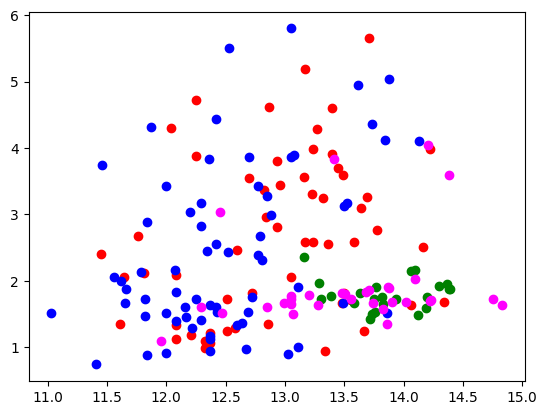

In [25]:
predictions = model.predict(df.data)
cluster_0 = df.data[predictions == 0]
cluster_1 = df.data[predictions == 1]
cluster_2 = df.data[predictions == 2]
cluster_3 = df.data[predictions == 3]
plt.scatter(cluster_0[:,0] , cluster_0[:,1] , color = 'red')
plt.scatter(cluster_1[:,0] , cluster_1[:,1] , color = 'green')
plt.scatter(cluster_2[:,0] , cluster_2[:,1] , color = 'blue')
plt.scatter(cluster_3[:,0] , cluster_3[:,1] , color = 'magenta')

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
dbscan = DBSCAN(eps=0.4, min_samples=4)
dbscan.fit(df.data)

DBSCAN(eps=0.4, min_samples=4)

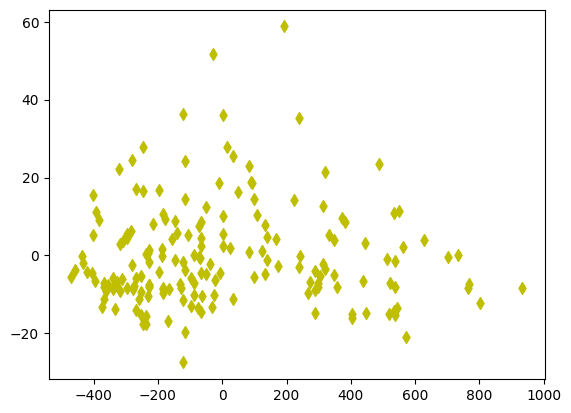

In [36]:
pca = PCA(n_components=2).fit(df.data)
pca_2d = pca.transform(df.data)

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='d')


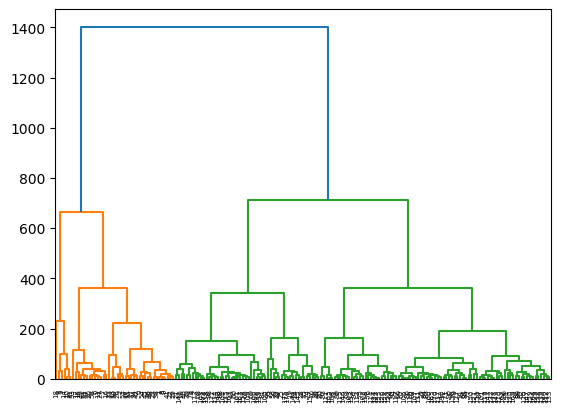

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(df.data, method = 'complete')
clusters = dendrogram(mergings,leaf_rotation=90)